In [1]:
###########import packages##########
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import ensemble
from sklearn.tree import ExtraTreeRegressor
from sklearn import svm
from sklearn import neighbors
from sklearn import tree
from sklearn import ensemble
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score
from sklearn.model_selection import LeaveOneOut
#%matplotlib 
###########import packages##########
import catboost
import xgboost
import lightgbm
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import *
import pickle
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import  *
###########import packages##########
import tensorflow as tf
import keras
from keras import optimizers
from keras import regularizers
from keras import backend as K
from keras.callbacks import EarlyStopping
from keras.callbacks import TensorBoard
from keras.constraints import max_norm
from keras.models import Sequential 
from keras.layers import Dense 
from keras.layers import Dropout 
from keras.models import Model
from keras.layers import BatchNormalization
from keras.wrappers.scikit_learn import KerasClassifier 
from keras.wrappers.scikit_learn import KerasRegressor
from keras.constraints import maxnorm 
# from keras.wrappers import scikit_learn
from scikeras.wrappers import KerasClassifier, KerasRegressor
###########loading data##########
loo = LeaveOneOut()
# %matplotlib



In [2]:
###########wrapping root mean square error for later calls##########
def compute_mae_mse_rmse(target,prediction):
    error = []
    for i in range(len(target)):
        error.append(target[i] - prediction[i])
    squaredError = []
    absError = []
    for val in error:
        squaredError.append(val * val)  # target-prediction之差平方
        absError.append(abs(val))  # 误差绝对值
    mae=sum(absError)/len(absError)  # 平均绝对误差MAE
    mse=sum(squaredError)/len(squaredError)  # 均方误差MSE
    RMSE=np.sqrt(sum(squaredError)/len(squaredError))
    R2=r2_score(target,prediction)
    return mae,mse,RMSE,R2
def gridsearch(model,param,algorithm_name,X_train,y_train,X_test,y_test):
    grid = GridSearchCV(model,param_grid=param,scoring='neg_mean_absolute_error',cv=10,n_jobs=-1,verbose=-1)
    grid.fit(X_train,y_train)
    best_model=grid.best_estimator_
    ####Train####
    prediction_train = best_model.predict(X_train)
    real_train=y_train.values
    prediction_train_series=pd.Series(prediction_train)
    real_train_series=pd.Series(real_train)
    corr_ann_train = round(prediction_train_series.corr(real_train_series), 5)
    error_val_train= compute_mae_mse_rmse(prediction_train,real_train)
    ####test####
    prediction_test = best_model.predict(X_test)
    real_test=y_test.values
    prediction_test_series=pd.Series(prediction_test)
    real_test_series=pd.Series(real_test)
    corr_ann_test = round(prediction_test_series.corr(real_test_series), 5)
    error_val_test= compute_mae_mse_rmse(prediction_test,real_test)
    print(algorithm_name)
    best_score=grid.best_score_
    print('Best Regressor:',grid.best_params_,'Best Score:', best_score)
    print(error_val_test)
    print('R2 TEST',error_val_test[3])
#     fig=plt.figure()
#     ax = fig.add_subplot(111)
#     x_y_x=np.arange(100,1500,0.01)
#     x_y_y=np.arange(100,1500,0.01)
#     ax.scatter(prediction_train,real_train,c='blue',label='Train',alpha=0.25)
#     ax.scatter(prediction_test,real_test,c='red',label='Test',alpha=0.75)
#     ax.plot(x_y_x,x_y_y,c='black')
#     plt.legend()
#     plt.xlabel('Predicted_Overpotential@10 mA cm-2')
#     plt.ylabel('Real_Overpotential@10 mA cm-2')
    return best_model,best_score

In [3]:
fl = open(r'./database_full_ac.pkl','rb')
database_full=pickle.load(fl)

In [4]:
database_full.shape

(1920, 55)

In [5]:
data_input_full=database_full.iloc[:,0:54]
data_output_full=database_full.iloc[:,54]

seed is  138
CatBoost
Best Regressor: {} Best Score: -40.803707267322764
(29.334156781291824, 1491.121914992755, 38.61504777923698, 0.7497559920264023)
R2 TEST 0.7497559920264023


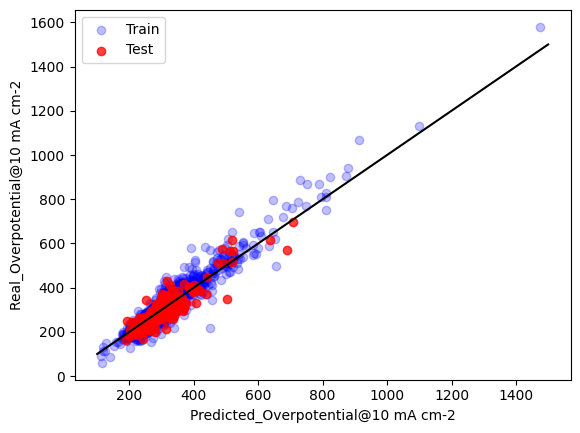

In [8]:
for seed in [138]:
    print('seed is ',seed)
    X_train,X_test,y_train,y_test=train_test_split(data_input_full,data_output_full,test_size=0.1,random_state=seed)
    model_CatRegressor=catboost.CatBoostRegressor(random_state=1,verbose=0)
    param_cat = {
    # 'learning_rate':[0.001,0.002,0.004,0.005,0.006,0.008,0.01,0.02,0.04,0.06,0.05,0.06,0.08,0.1,0.12,0.14,0.15,0.16,0.18,0.2],
    # 'n_estimators':[100,200,400],
    # "boosting_type":["Plain"],
    # 'max_depth':[5,7,9,11],
    # 'subsample':[0.4,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,1],
    # 'reg_lambda':[0,0.001,0.01,0.0001,0.00001]
    }
    CAT_full,CAT_full_score=gridsearch(model_CatRegressor,param_cat,'CatBoost',X_train,y_train,X_test,y_test)

In [ ]:
model_SVR = svm.SVR()
param_svr = {
    'kernel':['linear', 'poly', 'rbf'],
             'max_iter':[100,200,300,400,500,600,700,800,1000,1100,1200,1300,1400,1500],
         'degree':[2,3,4],
         'gamma':['scale','auto'],
         'epsilon':[0.001,0.01,0.1,0.3,0.5,0.7,1],
             'coef0':[100,200,300,400,500,600,700,800,1000,1100,1200,1300,1400,1500]
       }
SVR_full,SVR_full_score=gridsearch(model_SVR,param_svr,'Support Vector Regressor',data_input_full,data_output_full)

In [ ]:
model_KNeighborsRegressor = neighbors.KNeighborsRegressor()
param_knr = {
    'n_neighbors':range(1,10),'weights':['uniform','distance'],
             'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
         'leaf_size':[2,10,20,30,40,50,100],
         'p':range(1,10)
       }
KNR_full,KNR_full_score=gridsearch(model_KNeighborsRegressor,param_knr,'K Nearest Neighbor Regressor',data_input_full,data_output_full)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004353 seconds.
You can set `force_col_wise=true` to remove the overhead.
LightGBM
Best Regressor: {} Best Score: -41.416229066656925
(31.273165199560307, 1845.8498477022192, 42.963354707264415, 0.6950074091639267)
R2 TEST 0.6950074091639267


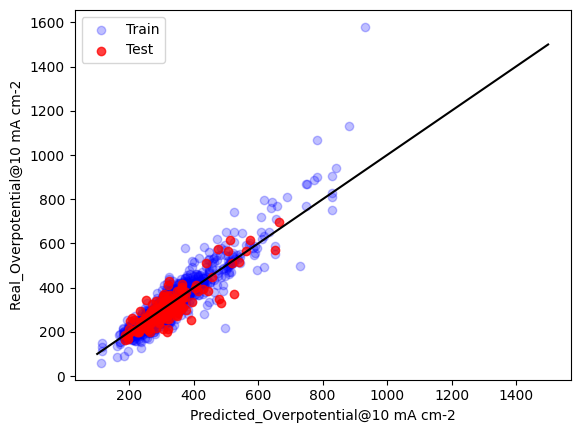

In [9]:
model_LGBMRegressor=LGBMRegressor(random_state=1,verbose=0)
param_lgbm = {
'boosting_type':['gbdt','rf'],
'learning_rate':[0.001,0.002,0.004,0.005,0.006,0.008,0.01,0.02,0.04,0.06,0.05,0.06,0.08,0.1,0.12,0.14,0.15,0.16,0.18,0.2,0.4,0.5,0.6,0.8,1],
'subsample':[0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,1],
'n_estimators':[50,100,200,400],
'max_depth':[5,7,9,11,13,-1],
'reg_alpha':[0,0.001,0.01,0.0001,0.00001],
'reg_lambda':[0,0.001,0.01,0.0001,0.00001]
}
LGBM_full,LGBM_full_score=gridsearch(model_LGBMRegressor,param_lgbm,'LightGBM',X_train,y_train,X_test,y_test)

XGBoost
Best Regressor: {'max_depth': 3} Best Score: -44.47993881455319
(31.665460030237835, 1861.062049684492, 43.14002839225412, 0.6873897938664009)
R2 TEST 0.6873897938664009


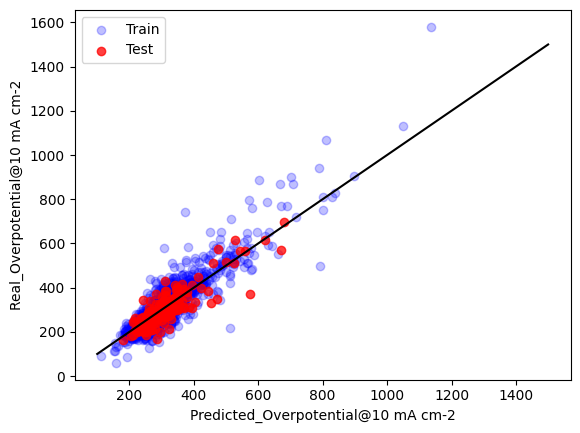

In [10]:
model_XGRegressor=XGBRegressor(random_state=1)
param_xg={
'booster':['gbtree'],
'learning_rate':[0.001,0.002,0.004,0.005,0.006,0.008,0.01,0.02,0.04,0.06,0.05,0.06,0.08,0.1,0.12,0.14,0.15,0.16,0.18,0.2,0.4,0.5,0.6,0.8,1],
'n_estimators':[100,200,400],
'max_depth':[3,5,7,9,11,13,-1],
'subsample':[0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,1],
'reg_alpha':[0,0.001,0.01,0.0001,0.00001],
'reg_lambda':[0,0.001,0.01,0.0001,0.00001]
}
XG_full,XG_full_score=gridsearch(model_XGRegressor,param_xg,'XGBoost',X_train,y_train,X_test,y_test)

In [ ]:
model_CatRegressor=catboost.CatBoostRegressor(random_state=1,verbose=0)
param_cat = {
'learning_rate':[0.001,0.002,0.004,0.005,0.006,0.008,0.01,0.02,0.04,0.06,0.05,0.06,0.08,0.1,0.12,0.14,0.15,0.16,0.18,0.2],
'n_estimators':[100,200,400],
"boosting_type":["Plain"],
'max_depth':[5,7,9,11],
'subsample':[0.4,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,1],
'reg_lambda':[0,0.001,0.01,0.0001,0.00001]
}
CAT_full,CAT_full_score=gridsearch(model_CatRegressor,param_cat,'CatBoost',X_train,y_train,X_test,y_test)

In [ ]:
model_GradientBoostingRegressor = ensemble.GradientBoostingRegressor(random_state=1)
###########defining the parameters dictionary##########
param_GB = {
'learning_rate':[0.001,0.002,0.004,0.005,0.006,0.008,0.01,0.02,0.04,0.06,0.05,0.06,0.08,0.1,0.12,0.14,0.15,0.16,0.18,0.2,0.4,0.5,0.6,0.8,1],
'n_estimators':[50,100,200,400],
'max_depth':[3,5,7,9,11,13,16],
'criterion':['friedman_mse','mae','mse'],
'max_features':['auto','sqrt','log2'],
'loss':['ls', 'lad', 'huber', 'quantile']
}
GB_full,GB_full_score=gridsearch(model_GradientBoostingRegressor,param_GB,'GradientBoost',data_input_full,data_output_full)

In [ ]:
###########RandomForest gridsearch CV for best hyperparameter##########
model_RandomForestRegressor = ensemble.RandomForestRegressor(random_state=1)
###########defining the parameters dictionary##########
param_RF = {
'n_estimators':[50,100,200,400,None],
'max_depth':[3,5,7,9,11,None],
'criterion':['mse','mae'],
'max_features':['auto','sqrt','log2']
}
RF_full,RF_full_score=gridsearch(model_RandomForestRegressor,param_RF,'Random Forest',data_input_full,data_output_full)

In [ ]:
model_DecisionTreeRegressor = tree.DecisionTreeRegressor(random_state=1)
param_dt={
'max_depth':[5,6,7,8,9,10,11,None],
'max_features':['auto','sqrt','log2'],
'criterion' : ["mse", "friedman_mse", "mae"],
'splitter' : [ "best",'random']
}
DT_full,DT_full_score=gridsearch(model_DecisionTreeRegressor,param_dt,'Decision Tree',data_input_full,data_output_full)

In [ ]:
model_AdaBoostRegressor = ensemble.AdaBoostRegressor(random_state=1)
param_ada={
'n_estimators':[50,100,200,400,800],
'learning_rate':[0.001,0.002,0.004,0.005,0.006,0.008,0.01,0.02,0.04,0.06,0.05,0.06,0.08,0.1,0.12,0.14,0.15,0.16,0.18,0.2,0.4,0.5,0.6,0.8,1],
'loss':['linear', 'square', 'exponential'] 
}
ADA_full,ADA_full_score=gridsearch(model_AdaBoostRegressor,param_ada,'AdaBoost',data_input_full,data_output_full)

In [11]:
def create_ANN_model_1layer(X,learning_rate,regular_term=0.001,neuron_number=50,drop_out_rate=0):
    regularizer=keras.regularizers.l2(regular_term)
    model = Sequential() 
    model.add(Dense(neuron_number, input_dim=X.shape[1], kernel_initializer='random_normal',
                    bias_initializer='random_normal',activation='relu',kernel_regularizer=regularizer)) 
    model.add(Dropout(drop_out_rate))
    model.add(Dense(neuron_number, input_dim=neuron_number, kernel_initializer='random_normal',
                    bias_initializer='random_normal',activation='relu',kernel_regularizer=regularizer)) 
    model.add(Dropout(drop_out_rate))
    model.add(Dense(1, input_dim=neuron_number, activation='linear'))
    adam=optimizers.Adam(learning_rate)
    model.compile(loss='mae')
    return model
def create_ANN_model_2layer(X,learning_rate,regular_term=0.001,neuron_number=50,drop_out_rate=0):
    regularizer=keras.regularizers.l2(regular_term)
    model = Sequential() 
    model.add(Dense(neuron_number, input_dim=X.shape[1], kernel_initializer='random_normal',
                    bias_initializer='random_normal',activation='relu',kernel_regularizer=regularizer)) 
    model.add(Dropout(drop_out_rate))
    model.add(Dense(neuron_number, input_dim=neuron_number, kernel_initializer='random_normal',
                    bias_initializer='random_normal',activation='relu',kernel_regularizer=regularizer)) 
    model.add(Dropout(drop_out_rate))
    model.add(Dense(neuron_number, input_dim=neuron_number, kernel_initializer='random_normal',
                    bias_initializer='random_normal',activation='relu',kernel_regularizer=regularizer)) 
    model.add(Dropout(drop_out_rate))
    model.add(Dense(1, input_dim=neuron_number, activation='linear'))
    adam=optimizers.Adam(learning_rate)
    model.compile(loss='mae')
    return model

In [ ]:
model_ANNRegressor1= KerasRegressor(build_fn=create_ANN_model_1layer(X=data_input_full,learning_rate=0.01), verbose=0)
model_ANNRegressor2= KerasRegressor(build_fn=create_ANN_model_2layer(X=data_input_full,learning_rate=0.01), verbose=0)

In [ ]:
epochs_list=[]
for i in range(10,210,10):
    epochs_list.append(i)

In [ ]:
# 设置参数候选值
batch_size_list = [8,16,32]
optimizers_list=['sgd', 'rmsprop', 'adam', 'adagrad']
param_ann = dict(batch_size=batch_size_list, 
                 epochs=epochs_list,
                optimizer=optimizers_list
                )

In [ ]:
ANN_1layer,ANN_1layer_score=gridsearch(model_ANNRegressor1,param_ann_1,'Artificial Neural Network',data_input_full,data_output_full)

In [ ]:
ANN_2layer,ANN_2layer_score=gridsearch(model_ANNRegressor2,param_ann_2,'Artificial Neural Network',data_input_full,data_output_full)

In [ ]:
# model_ANNRegressor.get_params().keys()

In [1]:
element_information={}
element_information['None']=[0,0,0,0,0,0,0,0]
element_information['Ru']=[101.07, 44, 5, 8, 7.5, 2.2, 7, 134]
element_information['Ir']=[192.217, 77, 6, 9, 9.1, 2.2, 7, 136]
element_information['Mn']=[54.938, 25, 4, 7, 7.4, 1.56, 5, 127]
element_information['Ba']=[137.327, 56, 6, 2, 5.19, 0.89, 10, 222]
element_information['Sr']=[87.62, 38, 5, 2, 5.67, 0.95, 10, 215]
element_information['Na']=[22.9897, 11, 3, 1, 5.12, 0.93, 0, 190]
element_information['Ag']=[107.868, 47, 5, 11, 7.54, 1.93, 10, 144]
element_information['La']=[138.905, 57, 6, 3, 5.5, 1.1, 1, 187]
element_information['Zn']=[65.38, 30, 4, 12, 9.35, 1.65, 10, 138]
element_information['K']=[39.0983, 19, 4, 1, 4.32, 0.82, 0, 235]
element_information['Al']=[26.9815, 13, 3, 13, 5.95, 1.61, 0,143]
element_information['Au']=[196.966, 79, 6, 11, 9.19, 2.54, 10, 144]
element_information['Pr']=[140.904, 59, 6, 3, 5.76, 1.13, 10, 182]
element_information['Nb']=[92.906, 41, 5, 5, 6.76, 1.6, 4, 146]
element_information['Li']=[6.941, 3, 2, 1, 5.37, 0.98, 0, 145]
element_information['Ca']=[40.078, 20, 4, 2, 6.09, 1, 0, 197]
element_information['Cr']=[51.996, 24, 4, 6, 6.74, 1.66, 4, 130]
element_information['In']=[114.818, 49, 5, 13, 8.95, 1.78, 10, 166]
element_information['Nd']=[144.242, 60, 6, 3, 6.31, 1.14, 10, 182]
element_information['Mo']=[95.94, 42, 5, 6, 7.35, 2.16, 5, 139]
element_information['Ti']=[47.867, 22, 4, 4, 6.81, 1.54, 2, 147]
element_information['W']=[183.84, 74, 6, 6, 7.98, 2.36, 4, 141]
element_information['Zr']=[91.224, 40, 5, 4, 6, 1.33, 2, 160]
element_information['Ce']=[140.116, 58, 6, 3, 6.91, 1.12, 1, 181]
element_information['Re']=[186.207, 75, 6, 7, 7.88, 1.9, 5, 137]
element_information['Ta']=[180.947,73, 6, 5, 7.89, 1.5, 3, 149]
element_information['Gd']=[157.25, 64, 6, 3, 6.65, 1.2, 1, 179]
element_information['F']=[18.9984, 9, 2, 17, 18.6, 3.98, 0, 73]
element_information['Sm']=[150.36, 62, 6, 3, 6.55, 1.1, 10, 181]
element_information['N']=[14.0067, 7, 2, 15, 14.48, 3.04, 0, 92]
element_information['Er']=[167.529, 68, 6, 3, 6.108, 1.23, 10, 178]
element_information['Sn']=[118.71, 50, 5, 14, 7.37, 1.96, 10, 162]
element_information['Pd']=[106.42, 46, 5, 10, 8.3, 2.2, 10, 137]
element_information['Ni']=[58.6934, 28, 4, 10, 7.61, 1.91, 8, 124]
#################################################################
element_information['Sc']=[44.956, 21, 4, 3, 6.57, 1.36, 1, 162]
element_information['V']=[50.942, 23, 4, 5, 6.76, 1.63, 3, 134]
element_information['Fe']=[55.845, 26, 4, 8, 7.83, 1.83, 6, 126]
element_information['Co']=[58.933, 27, 4, 9, 7.81, 1.88, 7, 125]
element_information['Cu']=[63.546, 29, 4, 11, 7.69, 1.9, 10, 128]
element_information['Ga']=[69.723, 31, 4, 13, 5.97, 1.81, 10, 141]
element_information['Y']=[88.905, 39, 5, 3, 6.5, 1.22, 1, 178]
element_information['Mo']=[95.94, 42, 5, 6, 7.35, 2.16, 5, 139]
element_information['Tc']=[98.906, 43, 5, 7, 7.28, 1.9, 5, 136]
element_information['Rh']=[102.905, 45, 5, 9, 7.7, 2.28, 8, 134]
element_information['Cd']=[112.411, 48, 5, 12, 8.95, 1.69, 10, 154]
element_information['Pm']=[144.912, 61, 6, 3 ,5.55, 1.13, 10, 183]
element_information['Eu']=[151.964, 63, 6, 3, 5.67, 1.2, 10, 199]
element_information['Tb']=[158.925, 65, 6, 3, 6.74, 1.2, 10, 180]
element_information['Dy']=[162.5, 66, 6, 3, 6.82, 1.22, 10, 180]
element_information['Ho']=[164.93, 67, 6, 3, 6.022, 1.23, 10, 179]
element_information['Tm']=[168.934, 69, 6, 3, 6.184, 1.25, 10, 177]
element_information['Yb']=[173.04, 70, 6, 3, 7.06, 1.1, 10, 176]
element_information['Lu']=[174.967, 71, 6, 3, 5.4259, 1.27, 1, 175]
element_information['Hf']=[178.49, 72, 6, 4, 6.8251, 1.3, 2, 167]
element_information['Os']=[190.23, 76, 6, 8, 8.7, 2.2, 6, 135]
element_information['Pt']=[195.084, 78, 6, 10, 8.9, 2.28, 9, 139]
element_information['Hg']=[200.59, 80, 6, 12, 10.39, 2, 10, 157]
element_information['Tl']=[204.383, 81, 6, 13, 6.08, 1.62, 10, 171]
element_information['Pb']=[207.2, 82, 6, 14, 7.38, 2.33, 10, 175]
element_information['Bi']=[208.98, 83, 6, 15, 7.25, 2.02, 10, 170]
element_information['Mg']=[24.3050, 12, 3, 2, 7.61, 1.31, 0, 160]
element_information['C']=[12.0107, 6, 2, 14, 11.22, 2.56, 0, 77]
element_information['B']=[10.811, 5, 2, 13, 8.33, 2.04, 0, 98]
element_information['P']=[30.9737, 15, 3, 15, 10.3, 2.19, 0, 128]
element_information['S']=[32.065, 16, 3, 16, 10.31, 2.58, 0, 127]
element_information['Sb']=[121.760, 51, 5, 15, 8.35, 2.05, 10, 159]
element_information['Te']=[127.6, 52, 5, 16, 9.0096, 2.1, 10, 160]
element_information['Br']=[79.904, 35, 4, 17, 11.8, 2.96, 10, 115]
element_information['Cl']=[35.453, 17, 3, 17, 12.96, 3.16, 0, 99]
element_information['Si']=[28.0855, 14, 3, 14, 8.12, 1.9, 0, 132]
element_information['Se']=[78.96, 34, 4, 16, 9.5, 2.55, 10, 140]

In [2]:
element_list=list(element_information.keys())

In [4]:
element_list[9]

'Zn'

In [ ]:
def equa_element_2(x):
    return ((x[1]==0 and x[5]==0) or (x[1]!=0 and x[5]!=0))-1
def equa_element_3(x):
    return ((x[2]==0 and x[6]==0) or (x[2]!=0 and x[6]!=0))-1
def equa_element_4(x):
    return ((x[3]==0 and x[7]==0) or (x[3]!=0 and x[7]!=0))-1
def uneq_element_2(x):
    return ((x[1]!=x[0] and x[1]!=x[2] and x[1]!=x[3]) or (x[1]==0 and x[2]==0 and x[3]==0))-1
def uneq_element_3(x):
    return ((x[2]!=x[0] and x[2]!=x[1] and x[2]!=x[3]) or (x[1]==0 and x[2]==0 and x[3]==0) or (x[2]==0 and x[3]==0))-1
def uneq_element_4(x):
    return ((x[3]!=x[0] and x[3]!=x[1] and x[3]!=x[2]) or (x[1]==0 and x[2]==0 and x[3]==0) or (x[2]==0 and x[3]==0))-1
def must_need_element_Ir_Ru(x):
    return ((1 in [x[0],x[1],x[2],x[3]]) or (2 in [x[0],x[1],x[2],x[3]]))-1
def sum_prop(x):
    return 100  -x[4] -x[5] -x[6] -x[7]
# def annealing_req(x):
#     return x[12]*x[13]

In [ ]:
constraint_eq = [
    sum_prop,
    equa_element_2,
    equa_element_3,
    equa_element_4,
    uneq_element_2,
    uneq_element_3,
    uneq_element_4,
    must_need_element_Ir_Ru
#     annealing_req
    ]

constraint_ueq = [
    lambda x: x[7] - x[6],
    lambda x: x[6] - x[5],
    lambda x: x[5] - x[4],
    lambda x: x[10]+x[11]-1.9
    ]

In [ ]:
import numpy as np
from sko.GA import GA
import time
import datetime
from sko.tools import set_run_mode


def generate_costly_function(task_type='io_costly'):
    # generate a high cost function to test all the modes
    # cost_type can be 'io_costly' or 'cpu_costly'
    if task_type == 'io_costly':
        def costly_function():
            time.sleep(0.1)
            return 1
    else:
        def costly_function():
            n = 10000
            step1 = [np.log(i + 1) for i in range(n)]
            step2 = [np.power(i, 1.1) for i in range(n)]
            step3 = sum(step1) + sum(step2)
            return step3

    return costly_function


In [ ]:
from numpy import *

In [ ]:
def predict_func_OVP_400(p):
    ele_1,ele_2,ele_3,ele_4,prop_1,prop_2,prop_3,prop_4,hydro_temp,hydro_time,hydro_reduc,hydro_ball,post_process=p
    test_info=[0.5,0,0,0,5,1]
    ele_info=element_information[element_list[int(ele_1)]]+element_information[element_list[int(ele_2)]]+element_information[element_list[int(ele_3)]]+element_information[element_list[int(ele_4)]]
    prop_info=[prop_1,prop_2,prop_3,prop_4]
    hydrothermal_info=[hydro_temp,hydro_time,1]+[0,hydro_reduc,hydro_ball]
    annealing_info=[400,180,0,0,0,post_process]
    ###合并制备条件
    info_all=ele_info+prop_info+hydrothermal_info+annealing_info+test_info
    input_array=np.array(info_all)
    input_array=input_array.reshape(1, -1)
    input_array=pd.DataFrame(input_array,columns=data_input_full.columns)
    #####预测
    pred_list=[]
    pred_list.append(SVR_full.predict(input_array)[0])
    pred_list.append(KNR_full.predict(input_array)[0])
    pred_list.append(LGBM_full.predict(input_array)[0])
    pred_list.append(XG_full.predict(input_array)[0])
    pred_list.append(CAT_full.predict(input_array)[0])
    pred_list.append(GB_full.predict(input_array)[0])
    pred_list.append(RF_full.predict(input_array)[0])
    pred_list.append(DT_full.predict(input_array)[0])
    pred_list.append(ADA_full.predict(input_array)[0])
    pred_list.append(ANN_1layer.predict(input_array)[0])
    pred_list.append(ANN_2layer.predict(input_array)[0])
#     print(pred_list)
    ####weighted_score####
    test_score_list=[SVR_full_score,
    KNR_full_score,
    LGBM_full_score,
    XG_full_score,
    CAT_full_score,
    GB_full_score,
    RF_full_score,
    DT_full_score,
    ADA_full_score,
    ANN_1layer_score,
    ANN_2layer_score]
    weighted_score_list=test_score_list/max(test_score_list)
    for i in range (0,len(weighted_score_list)):
        weighted_score_list[i]=1/weighted_score_list[i]
#     print(weighted_score_list)
    weighted_pred_list=[]
    for i in range(0,len(weighted_score_list)):
        weighted_pred_list.append(weighted_score_list[i]*pred_list[i])
#     print(weighted_pred_list)    
    return mean(weighted_pred_list)
def predict_func_variance_400(p):
    ele_1,ele_2,ele_3,ele_4,prop_1,prop_2,prop_3,prop_4,hydro_temp,hydro_time,hydro_reduc,hydro_ball,post_process=p
    test_info=[0.5,0,0,0,5,1]
    ele_info=element_information[element_list[int(ele_1)]]+element_information[element_list[int(ele_2)]]+element_information[element_list[int(ele_3)]]+element_information[element_list[int(ele_4)]]
    prop_info=[prop_1,prop_2,prop_3,prop_4]
    hydrothermal_info=[hydro_temp,hydro_time,1]+[0,hydro_reduc,hydro_ball]
    annealing_info=[400,180,0,0,0,post_process]
    ###合并制备条件
    info_all=ele_info+prop_info+hydrothermal_info+annealing_info+test_info
    input_array=np.array(info_all)
    input_array=input_array.reshape(1, -1)
    input_array=pd.DataFrame(input_array,columns=data_input_full.columns)
    #####预测
    pred_list=[]
    pred_list.append(SVR_full.predict(input_array)[0])
    pred_list.append(KNR_full.predict(input_array)[0])
    pred_list.append(LGBM_full.predict(input_array)[0])
    pred_list.append(XG_full.predict(input_array)[0])
    pred_list.append(CAT_full.predict(input_array)[0])
    pred_list.append(GB_full.predict(input_array)[0])
    pred_list.append(RF_full.predict(input_array)[0])
    pred_list.append(DT_full.predict(input_array)[0])
    pred_list.append(ADA_full.predict(input_array)[0])
    pred_list.append(ANN_1layer.predict(input_array)[0])
    pred_list.append(ANN_2layer.predict(input_array)[0])
#     print(pred_list)
    ####weighted_score####
    test_score_list=[SVR_full_score,
    KNR_full_score,
    LGBM_full_score,
    XG_full_score,
    CAT_full_score,
    GB_full_score,
    RF_full_score,
    DT_full_score,
    ADA_full_score,
    ANN_1layer_score,
    ANN_2layer_score]
    weighted_score_list=test_score_list/max(test_score_list)
    for i in range (0,len(weighted_score_list)):
        weighted_score_list[i]=1/weighted_score_list[i]
#     print(weighted_score_list)
    weighted_pred_list=[]
    for i in range(0,len(weighted_score_list)):
        weighted_pred_list.append(weighted_score_list[i]*pred_list[i])
#     print(weighted_pred_list)    
    return -np.var(pred_list)


In [ ]:
for i in range(0,20):
    task_type='cpu_costly'
    costly_function = generate_costly_function(task_type=task_type)
    # to use the vectorization mode, the function itself should support the mode.
    mode = 'common'
    # mode ='vectorization'
    set_run_mode(predict_func_OVP_400, mode)
    ga = GA(func=predict_func_OVP_400, n_dim=13, size_pop=3000, max_iter=50,prob_mut=0.01,lb=[1, 0, 0, 0, 0, 0, 0, 0,25, 360, 0, 0, 0], ub=[34, 34, 34, 34, 100, 100, 100, 100, 60,1440,1,1,1],
            constraint_eq=constraint_eq, constraint_ueq=constraint_ueq,precision=[1,1,1,1,1,1,1,1,1,1,1,1,1])
    start_time = datetime.datetime.now()
    best_x, best_y = ga.run()
    print('best_x:', best_x, '\n', 'best_y:', best_y)
    print('on {task_type} task,use {mode} mode, costs {time_costs}s'
          .format(task_type=task_type, mode=mode,
                  time_costs=(datetime.datetime.now() - start_time).total_seconds()))
    i+=1

In [9]:
element_list[5]

'Sr'